In [1]:
#Jupyter notebook to run the BC blues model and do some data analysis/visualization
#Import package=s
import time
import pandas as pd
import numpy as np
from BCBlues_1d import BCBlues_1d
import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
#plt.style.use("ggplot")
#from data_1d import makeic

In [6]:
#Load data
from BCBlues_1d import BCBlues_1d #re-import to get changes
params = pd.read_excel('params_1d.xlsx',index_col = 0) 
locsumm = pd.read_excel('Oro_Loma_1.xlsx',index_col = 0) 
chemsumm = pd.read_excel('EHDPPCHEMSUMM.xlsx',index_col = 0)
timeseries = pd.read_excel('timeseries_test2.xlsx')
totalt = 100
timeseries = timeseries[0:totalt]
numc = 8
pp = None
#Run model
test = BCBlues_1d(locsumm,chemsumm,params,8)
start = time.time()
#res_t, res_time = test.run_it(locsumm,chemsumm,params,numc,pp,timeseries)
res_t, res_time = test.run_it(locsumm,chemsumm,params,1,pp,timeseries)

codetime = (time.time()-start)

In [62]:
#Load the model outputs from a pickle file
outpath ='D:/OneDrive - University of Toronto/University/_Active Projects/Bioretention Blues Model/Model/Pickles/output.pkl'
res_time = pd.read_pickle(outpath)
res_time.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 184000 entries, (0, EHDPP, 0) to (249, TPhP, 45)
Columns: 451 entries, x to inp_mass8
dtypes: float64(383), int64(68)
memory usage: 633.8+ MB


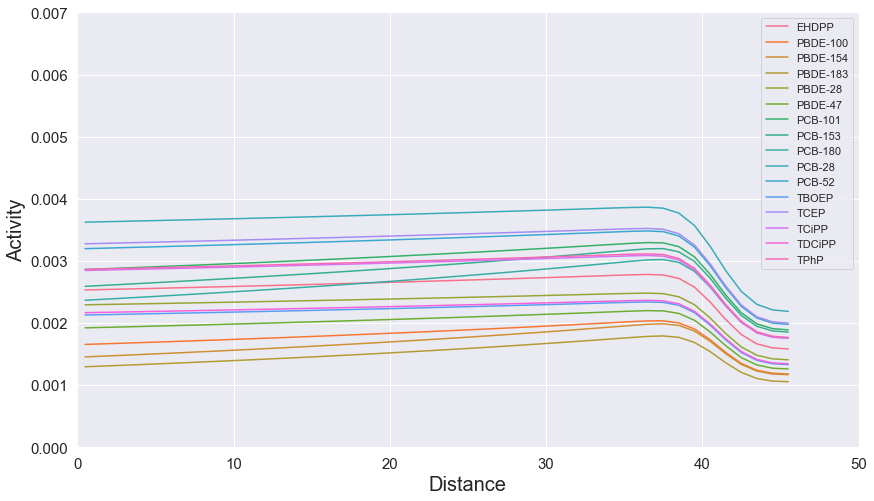

In [64]:
#Plot activity in the water compartment

#Set plotting parameters
%matplotlib inline
plttime = 99
yvar = 'a1_t1'
pltdata = res_time.loc[(plttime,slice(None),slice(None)),slice(None)] #Just at plttime
ylim = [-0.5e-11, 7e-3]
xlim = [0, 50]
ylabel = 'Activity'
xlabel = 'Distance'
#pltdata = res_time #All times at once
fig = plt.figure(figsize=(14,8))
ax = sns.lineplot(x = 'x', y = yvar, hue = pltdata.index.get_level_values(1),data = pltdata)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_ylabel(ylabel, fontsize=20)
ax.set_xlabel(xlabel, fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)


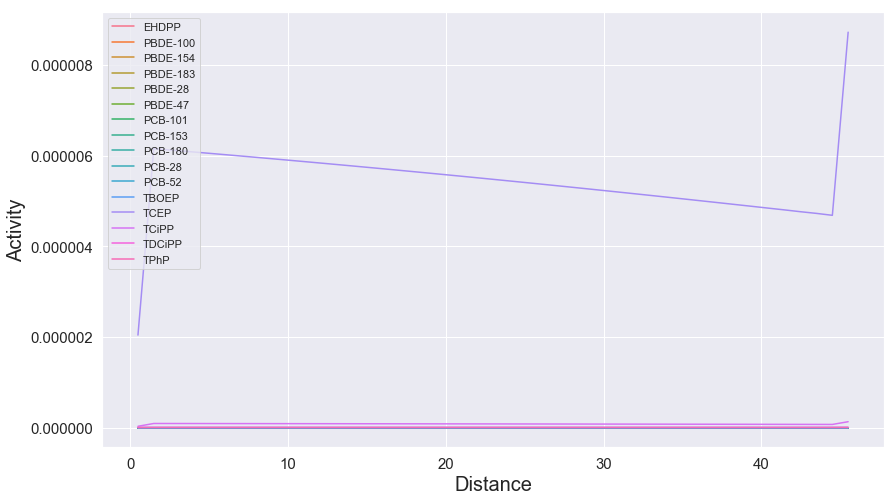

In [70]:
#Plot activity in another compartment

#Set plotting parameters
%matplotlib inline
plttime = 240
yvar = 'a3_t1'
pltdata = res_time.loc[(plttime,slice(None),slice(None)),slice(None)] #Just at plttime
#ylim = [-0.5e-11, 5e-11]
ylabel = 'Activity'
xlabel = 'Distance'
#pltdata = res_time #All times at once
fig = plt.figure(figsize=(14,8))
ax = sns.lineplot(x = 'x', y = yvar, hue = pltdata.index.get_level_values(1),data = pltdata)
#ax.set_ylim(ylim)
ax.set_ylabel(ylabel, fontsize=20)
ax.set_xlabel(xlabel, fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)


In [131]:
#Load the model outputs from a pickle file
outpath ='D:/OneDrive - University of Toronto/University/_Active Projects/Bioretention Blues Model/Model/Pickles/output.pkl'
res_time = pd.read_pickle(outpath)
res_time.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 220800 entries, (0, EHDPP, 0) to (799, TPhP, 45)
Columns: 451 entries, x to inp_mass8
dtypes: float64(383), int64(68)
memory usage: 760.6+ MB


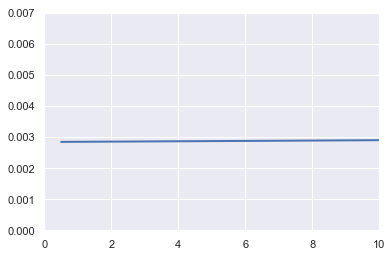

In [69]:
#Animated version of the activity through time for a selected compound
#Animation code adapted from http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/

fig, ax = plt.subplots()
#Set plotting parameters and variable
xlim = [0,10]
ylim = [-0.5e-11, 7e-3]
numframes = len(res_time.loc[(slice(None),'EHDPP',1),slice(None)])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
yvar = 'a1_t'
compound = 'TCiPP'
line, = ax.plot([], [], lw=2)
#Define the empty line - is this necessary?
def init():
    line.set_data([], [])
    return (line,)
#Define the animation function
def animate(i):
    x = np.array(res_time.loc[(0,compound,slice(None)),'x'])
    y = np.array(res_time.loc[(i,compound,slice(None)),yvar])
    #y1 = np.array(res_time.loc[(i,'EHDPP',slice(None)),yvar])
    line.set_data(x, y)
    #line.set_data(x, y1)
    return (line,)

#This defines the animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=numframes, interval=20, 
                               blit=True)
#Run the animation
HTML(anim.to_html5_video())
HTML(anim.to_jshtml())

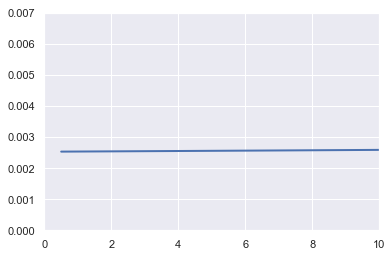

In [48]:
#Animated version of the activity in water through time for a selected compound
#Animation code adapted from http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/

fig, ax = plt.subplots()
#Set plotting parameters and variable
xlim = [0,10]
ylim = [-0.5e-11, 7e-3]
numframes = len(res_time.loc[(slice(None),'EHDPP',1),slice(None)])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
yvar = 'a1_t'
compound = 'EHDPP'
line, = ax.plot([], [], lw=2)
#Define the empty line - is this necessary?
def init():
    line.set_data([], [])
    return (line,)
#Define the animation function
def animate(i):
    x = np.array(res_time.loc[(0,compound,slice(None)),'x'])
    y = np.array(res_time.loc[(i,compound,slice(None)),yvar])
    #y1 = np.array(res_time.loc[(i,'EHDPP',slice(None)),yvar])
    line.set_data(x, y)
    #line.set_data(x, y1)
    return (line,)

#This defines the animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=numframes, interval=20, 
                               blit=True)
#Run the animation
HTML(anim.to_html5_video())
HTML(anim.to_jshtml())

KeyboardInterrupt: 

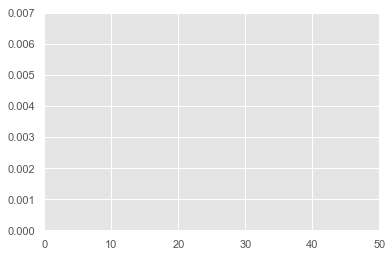

In [122]:
#Animated version of the activity through time for all compounds
#Animation code adapted from http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/

fig = plt.figure()
#Define number of chemicals and chemicals to plot
chems = res_time.index.get_level_values(1)
numchems = len(chems)
numframes = len(res_time.loc[(slice(None),'EHDPP',1),slice(None)])
#Set plotting parameters and variable
xlim = [0,50]
ylim = [-0.5e-11, 7e-3]
ax = plt.axes(xlim=xlim, ylim=ylim)
yvar = 'a1_t'

#Define lines  that will be plotted
lines = [plt.plot([], [])[0] for _ in range(numchems)] #lines to animate
patches = lines

#Define the init - is this necessary?
def init():
    #init lines
    for line in lines:
        line.set_data([],[])
    return patches

#Define the animation function
def animate(i):
    for j,line in enumerate(lines):
        compound = chems[j]
        x = np.array(res_time.loc[(0,compound,slice(None)),'x'])
        y = np.array(res_time.loc[(i,compound,slice(None)),yvar])
        line.set_data([x],[y])
    return patches

#This defines the animation
anim = animation.FuncAnimation(fig, animate, init_func = init,frames=numframes,interval=20, 
                               blit=True)
#Run the animation
HTML(anim.to_html5_video())
HTML(anim.to_jshtml())

In [132]:
#Overall mass-fluxes for the figures
#mass = VZa
#Res_time levels are time, chemical, x
numx = len(res_time.groupby(level=2))
numc = 8
dt = res_time.index.levels[0][1]-res_time.index.levels[0][0]
#Make a dataframe to display mass flux on figure
#probably there is a better way
N_adv_out = res_time.M_n[slice(None),slice(None),numx-1] - res_time.M_xf[slice(None),slice(None),numx-1]
mass_flux = pd.DataFrame(index = N_adv_out.index)
mass_flux.loc[:,'N_adv_out'] = N_adv_out
mass_flux.loc[:,'N_adv_in'] = res_time.inp_mass1.groupby(level=[0,1]).sum()#This assumes inputs are zero
#Now, lets get to compartment-specific transport
for j in range(numc):#j is compartment mass is leaving
    Drj,Nrj,a_val, NTj, DTj= 'Dr' + str(j+1),'Nr' + str(j+1),'a'+str(j+1) + '_t1','NT' + str(j+1),'DT' + str(j+1)
    #Transformation (reaction) in each compartment Mr = Dr*a*V
    mass_flux.loc[:,Nrj] = dt*(res_time.loc[:,Drj] * res_time.loc[:,a_val]).groupby(level=[0,1]).sum()#Reactive mass loss
    mass_flux.loc[:,NTj] = dt*(res_time.loc[:,DTj] * res_time.loc[:,a_val]).groupby(level=[0,1]).sum()#Total mass out
    for k in range(numc):#From compartment j to compartment k
        if j != k:
            Djk,Njk,Nnetjk = 'D_'+str(j+1)+str(k+1),'N' +str(j+1)+str(k+1),'Nnet' +str(j+1)+str(k+1)
            mass_flux.loc[:,Njk] = dt*(res_time.loc[:,Djk] * res_time.loc[:,a_val]).groupby(level=[0,1]).sum()
#Growth dilution processes are modelled as first-order decay. For now, add to the reactive M value
mass_flux.loc[:,'Nr3'] += dt*(res_time.loc[:,'D_sg'] * res_time.loc[:,'a3_t1']).groupby(level=[0,1]).sum()
mass_flux.loc[:,'Nr6'] += dt*(res_time.loc[:,'D_rg6'] * res_time.loc[:,'a6_t1']).groupby(level=[0,1]).sum()
mass_flux.loc[:,'Nr7'] += dt*(res_time.loc[:,'D_rg7'] * res_time.loc[:,'a7_t1']).groupby(level=[0,1]).sum()
mass_flux.loc[:,'Nr8'] += dt*(res_time.loc[:,'D_rg8'] * res_time.loc[:,'a8_t1']).groupby(level=[0,1]).sum()

#Now, let's define the net transfer between compartments that we are interested in.
#The convention here is that a positive number is a transfer in the direction indicated, and a negative number is the opposite.
mass_flux.loc[:,'Nwss'] = mass_flux.N12 - mass_flux.N21
mass_flux.loc[:,'Nssts'] = mass_flux.N14 - mass_flux.N24
mass_flux.loc[:,'Nssrb'] = mass_flux.N26 - mass_flux.N62
mass_flux.loc[:,'Ntsrb'] = mass_flux.N46 - mass_flux.N64
mass_flux.loc[:,'Ntsa'] = mass_flux.N45 - mass_flux.N54
mass_flux.loc[:,'Nrbx'] = mass_flux.N67 - mass_flux.N76
mass_flux.loc[:,'Nxc'] = mass_flux.N78 - mass_flux.N87
mass_flux.loc[:,'Ncs'] = mass_flux.N83 - mass_flux.N38
mass_flux.loc[:,'Nsts'] = mass_flux.N34 - mass_flux.N43
mass_flux.loc[:,'Nsa'] = mass_flux.N35 - mass_flux.N53

#Overall 'removal' as 
mass_flux.loc[:,'removal'] = (mass_flux.N_adv_in-mass_flux.N_adv_out)/mass_flux.N_adv_in

#Then, we will put just the ones we want in a new dataframe for convenience
columns = ['N_adv_out','N_adv_in','Nr1','Nr2','Nr3','Nr4','Nr5','Nr6','Nr7','Nr8']
mf = mass_flux.loc[:,columns]
mf = pd.concat([mf,mass_flux.loc[:,'Nwss':'Nsa']],axis = 1)

In [133]:
#Now, let's see what the mass balance looks like. In each compartment dM = (M(t+1)-Mt) = sum(Nin)-sum(Nout)
#Set up the dataframe, same as above
mass_bal = pd.DataFrame(index = N_adv_out.index)
mf1 = mass_flux.copy(deep = True)
mass_bal.loc[:,'Msys_t'] = 0 #Initialize system mass
mass_bal.loc[:,'Msys_t1'] = 0 #Initialize system mass
for j in range(numc):#j is compartment mass is leaving
    Mtj,Mt1j,a_val_t1,a_val_t,Mbalpctj = 'Mt' + str(j+1),'Mt1' + str(j+1),'a'+str(j+1) + '_t1','a'+str(j+1) + '_t','Mbalpct' + str(j+1)
    Vj,Zj,dMj, Mbalj,NTj = 'V' + str(j+1),'Z' + str(j+1),'dM' + str(j+1),'Mbal' + str(j+1),'NT' + str(j+1)
    #Mass(j) = aVZ
    mass_bal.loc[:,Mtj] =(res_time.loc[:,a_val_t]*res_time.loc[:,Vj]*res_time.loc[:,Zj]).groupby(level=[0,1]).sum()
    mass_bal.loc[:,Mt1j] =(res_time.loc[:,a_val_t1]*res_time.loc[:,Vj]*res_time.loc[:,Zj]).groupby(level=[0,1]).sum()
    mass_bal.loc[:,dMj] = mass_bal.loc[:,Mt1j]-mass_bal.loc[:,Mtj]
    mass_bal.loc[:,'Msys_t'] += mass_bal.loc[:,Mtj] #Initialize system mass
    mass_bal.loc[:,'Msys_t1'] += mass_bal.loc[:,Mt1j] #Initialize system mass
    mass_bal.loc[:,Mbalj] = mf1.loc[:,NTj] - mf1.loc[:,NTj] #initialize the mass balance 
    for k in range(numc):
        if k != j:
            Nkj = 'N' +str(k+1)+str(j+1)
            mass_bal.loc[:,Mbalj] += mf1.loc[:,Nkj]

#Distribution of mass between compartments
for j in range(numc):
    Mtj,Mt1j,Mdistj,Mdist1j = 'Mt' + str(j+1),'Mt1' + str(j+1),'Mdist' + str(j+1),'Mdist1' + str(j+1)
    mass_bal.loc[:,Mdistj] = mass_bal.loc[:,Mtj]/mass_bal.loc[:,'Msys_t']
    mass_bal.loc[:,Mdist1j] = mass_bal.loc[:,Mt1j]/mass_bal.loc[:,'Msys_t1']
mass_bal.loc[:,'Mdist_plant_t1'] = mass_bal.loc[:,'Mdist3']+ mass_bal.loc[:,'Mdist6']+ mass_bal.loc[:,'Mdist7']\
+ mass_bal.loc[:,'Mdist8']
#    mass_bal.loc[:,Mbalpctj] = mf1.loc[:,Mbalj]/

KeyError: 0

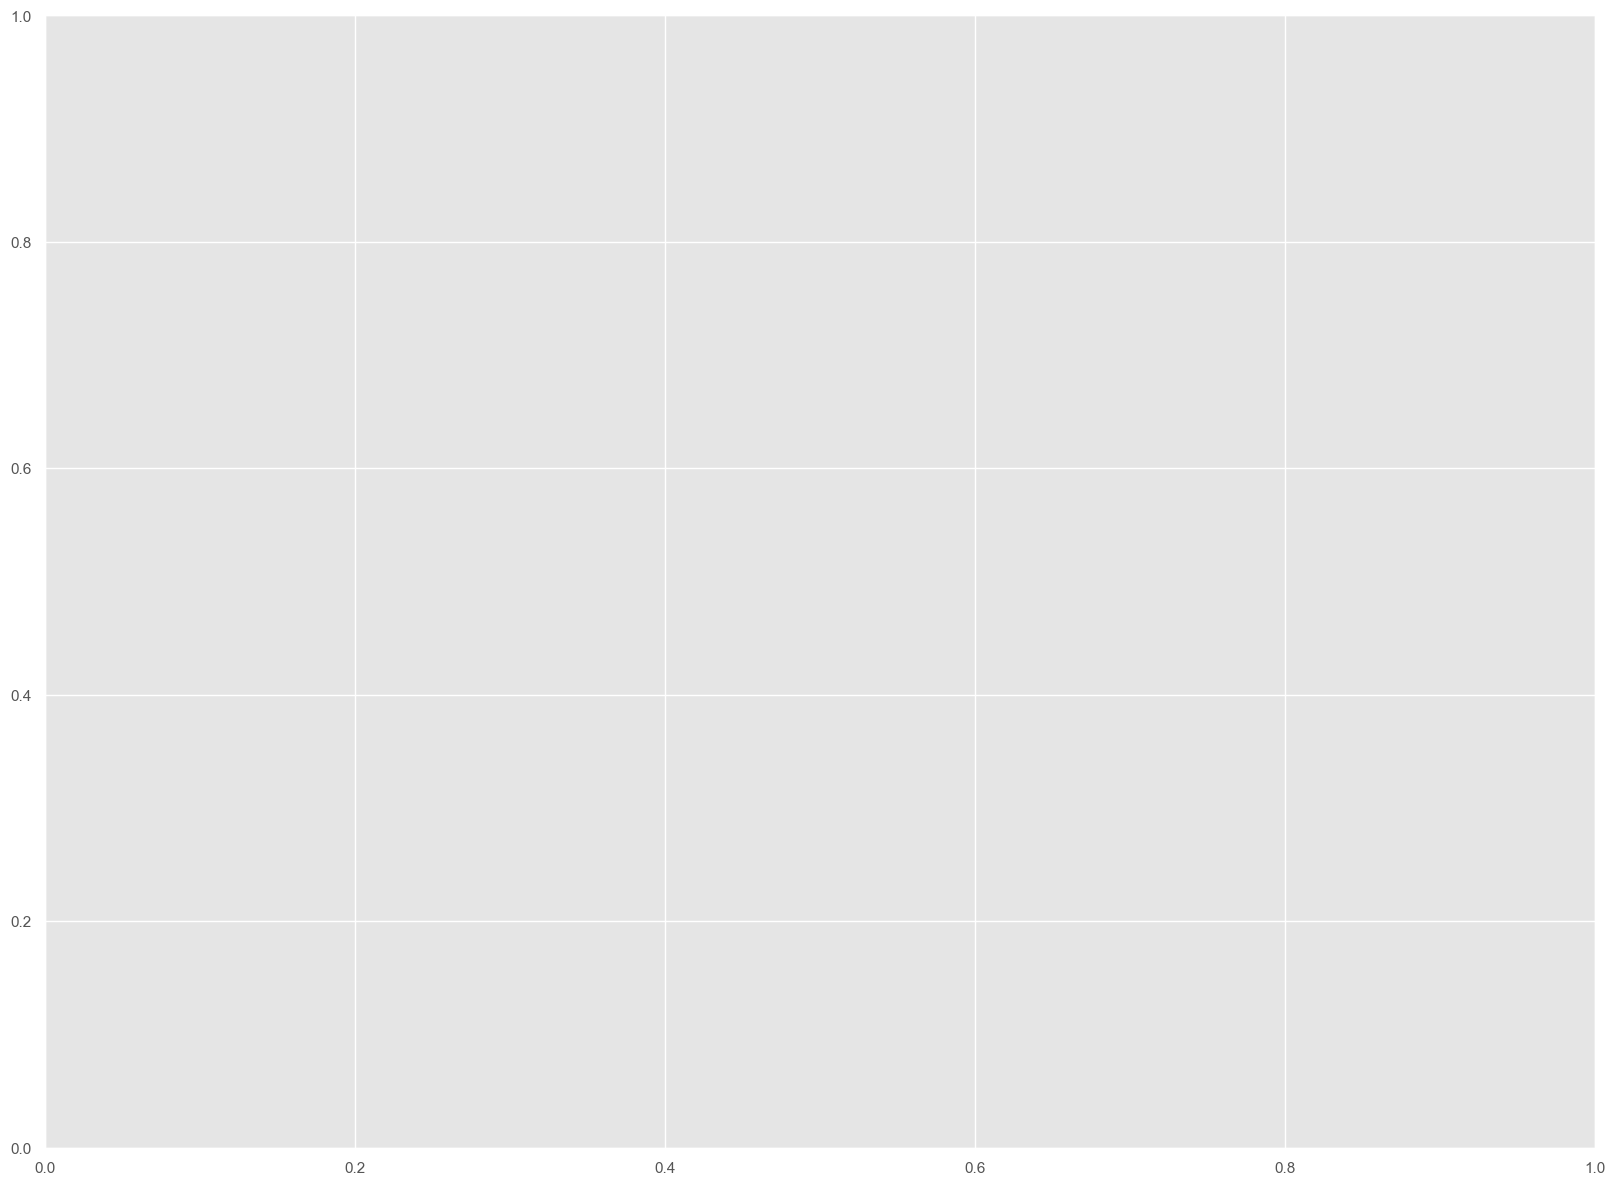

In [127]:
#Show processes on model schematic
#filepath = "D:\OneDrive - University of Toronto\University\_Active Projects\Bioretention Blues Model\OroLoma Documents\Figures"
filename = "Model_Figure_rgb.tif"
time = 50
compound = 'EHDPP'
mf2 = mf.loc[(time,compound),:]
mb = mass_bal.loc[(time,compound),:]
img = plt.imread(filename)
fig, ax = plt.subplots(figsize=(20, 15), dpi = 100)
#ax.grid(False)
#plt.axis('off')
#Index(['N_adv_out', 'N_adv_in', 'Nr1', 'Nr2', 'Nr3', 'Nr4', 'Nr5', 'Nr6',
#       'Nr7', 'Nr8', 'Nwss', 'Nssts', 'Nssrb', 'Ntsrb', 'Ntsa', 'Nrbx',
#       'Nxc','Ncs', 'Nsts', 'Nsa']
N_locs = [(2600,3650),(300,3500),(2250,2350),(2700,2450),(800,1050),(2700,1200),(250,450),(2050,1240),\
          (2250,1150),(2450,1300),(900,3350),(300,3100),(2085,1920),(2050,1770),(200,2200),(2650,2100),\
          (2700,1650),(1600,2400),(900,2350),(800,1600)]
# M1, M2,M3,M4,M5,M6,M7,M8
M_locs = [(2000,3250),(2000,3450),(2200,120)]
for col in range(len(mf.columns)):
    ax.annotate(f'{mf1[col]:.2e}',xy = N_locs[col],fontsize = 16, fontweight = 'bold')
    if col < len(M_locs):
        Mcol = col*4+1
        ax.annotate(f'{mb[Mcol]:.2e}',xy = M_locs[col],fontsize = 16, fontweight = 'bold')

ax.imshow(img)

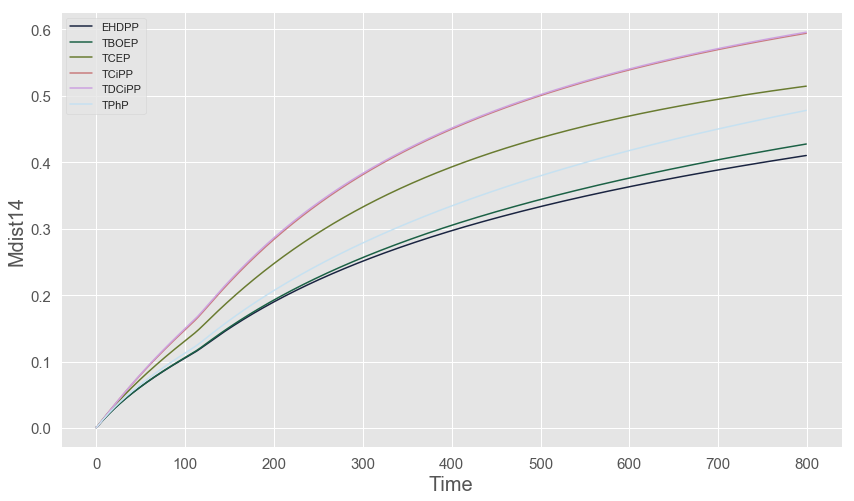

In [135]:
#Plot mass flux or balance stuff

#Set plotting parameters
%matplotlib inline
#pltdata = mass_bal
pltdata = mass_flux
numchems = len(pltdata.index.levels[1])
xvar = pltdata.index.get_level_values(0) #Time
comps = pltdata.index.get_level_values(1) #compounds
#Just at plttime
pal = sns.color_palette("cubehelix",numchems)
#yvar = 'Mdist14'
yvar = 'removal'
ylim = [0, 1.05]
ylabel = yvar
xlabel = 'Time'
#pltdata = res_time #All times at once
fig = plt.figure(figsize=(14,8))
ax = sns.lineplot(x = xvar, y = yvar, hue = comps,data = pltdata, palette = pal)
#ax.set_ylim(ylim)
ax.set_ylabel(ylabel, fontsize=20)
ax.set_xlabel(xlabel, fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
